In [60]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [87]:
def parseGoogleDoc(docURL):
    response = requests.get(docURL)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find("table")

    if table:
        tableContent = []
        rows = table.find_all("tr")
        for row in rows:
            cells = row.find_all("td")
            row_data = [cell.text.strip() for cell in cells]
            tableContent.append(row_data)
        return tableContent
    else:
        return None
docURL = 'https://docs.google.com/document/d/e/2PACX-1vQGUck9HIFCyezsrBSnmENk5ieJuYwpt7YHYEzeNJkIb9OSDdx-ov2nRNReKQyey-cwJOoEKUhLmN9z/pub'
tableResponse = parseGoogleDoc(docURL)


In [97]:
resp = np.array(tableResponse)
colNames = resp[0,:]
resp = np.delete(resp, (0), axis=0)


In [98]:
#xAxisMax = np.max(resp[:,0].astype(int))
#yAxisMax = np.max(resp[:,2].astype(int))
charValues = resp[:,1]
df = pd.DataFrame (resp, columns = colNames)
#df=df.sort_values(by=['y-coordinate', 'x-coordinate'], ascending=[False, False]).reset_index(drop=True)
df[['y-coordinate', 'x-coordinate']] = df[['y-coordinate', 'x-coordinate']].apply(pd.to_numeric)
#df[['Character']].dtypes


<Axes: xlabel='x-coordinate', ylabel='y-coordinate'>

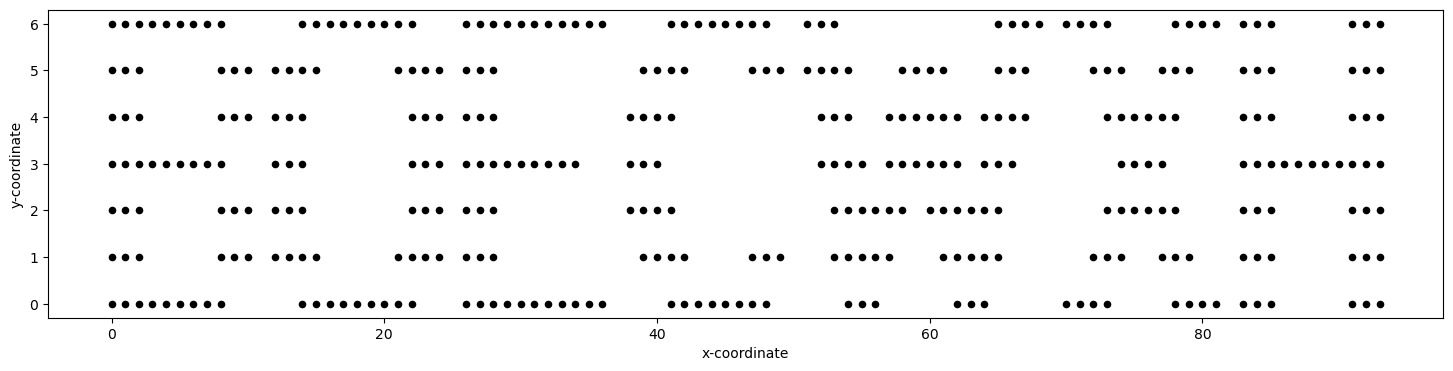

In [109]:
df.plot(kind='scatter', x='x-coordinate', y='y-coordinate', figsize=(18,4), color='black')

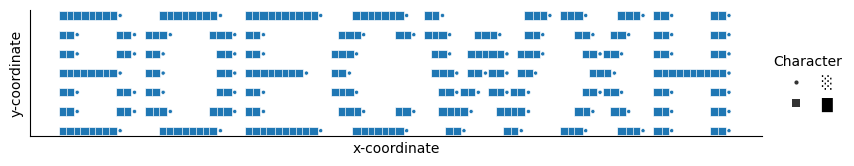

In [112]:
secretCode = sns.relplot(data=df, x='x-coordinate', y='y-coordinate',style='Character', markers=['.', 's'], height=2, aspect=4)
secretCode.set(xticks=[], yticks=[])
secretCode